In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt
from IPython.display import Image  
from sklearn.tree import export_graphviz
from matplotlib.legend_handler import HandlerLine2D
import warnings
warnings.filterwarnings('ignore')

In [2]:
#Orginal Dataset

org_df = pd.read_csv('Dataset/diabetes.csv')

In [3]:
#Creating a copy for the dataset for working on the same without affecting the original dataset

df_diab = org_df

In [4]:
df_diab

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1


In [5]:
#Finding the duplitcate and creating a dataset for the duplicted files

duplicate = df_diab[df_diab.duplicated()]

In [6]:
duplicate

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome


There are no duplicates on this Dataset

In [7]:
print("The Number of persons diagnosed positive:",len(df_diab[df_diab['Outcome'] == 1]))
print("The Number of persons diagnosed negative:",len(df_diab[df_diab['Outcome'] == 0]))
print("The proportion of persons diagnosed positive:",(len(df_diab[df_diab['Outcome'] == 1])/len(df_diab)))

The Number of persons diagnosed positive: 268
The Number of persons diagnosed negative: 500
The proportion of persons diagnosed positive: 0.3489583333333333


'The below shows that there are outliers present on the dataset which need to be treated '

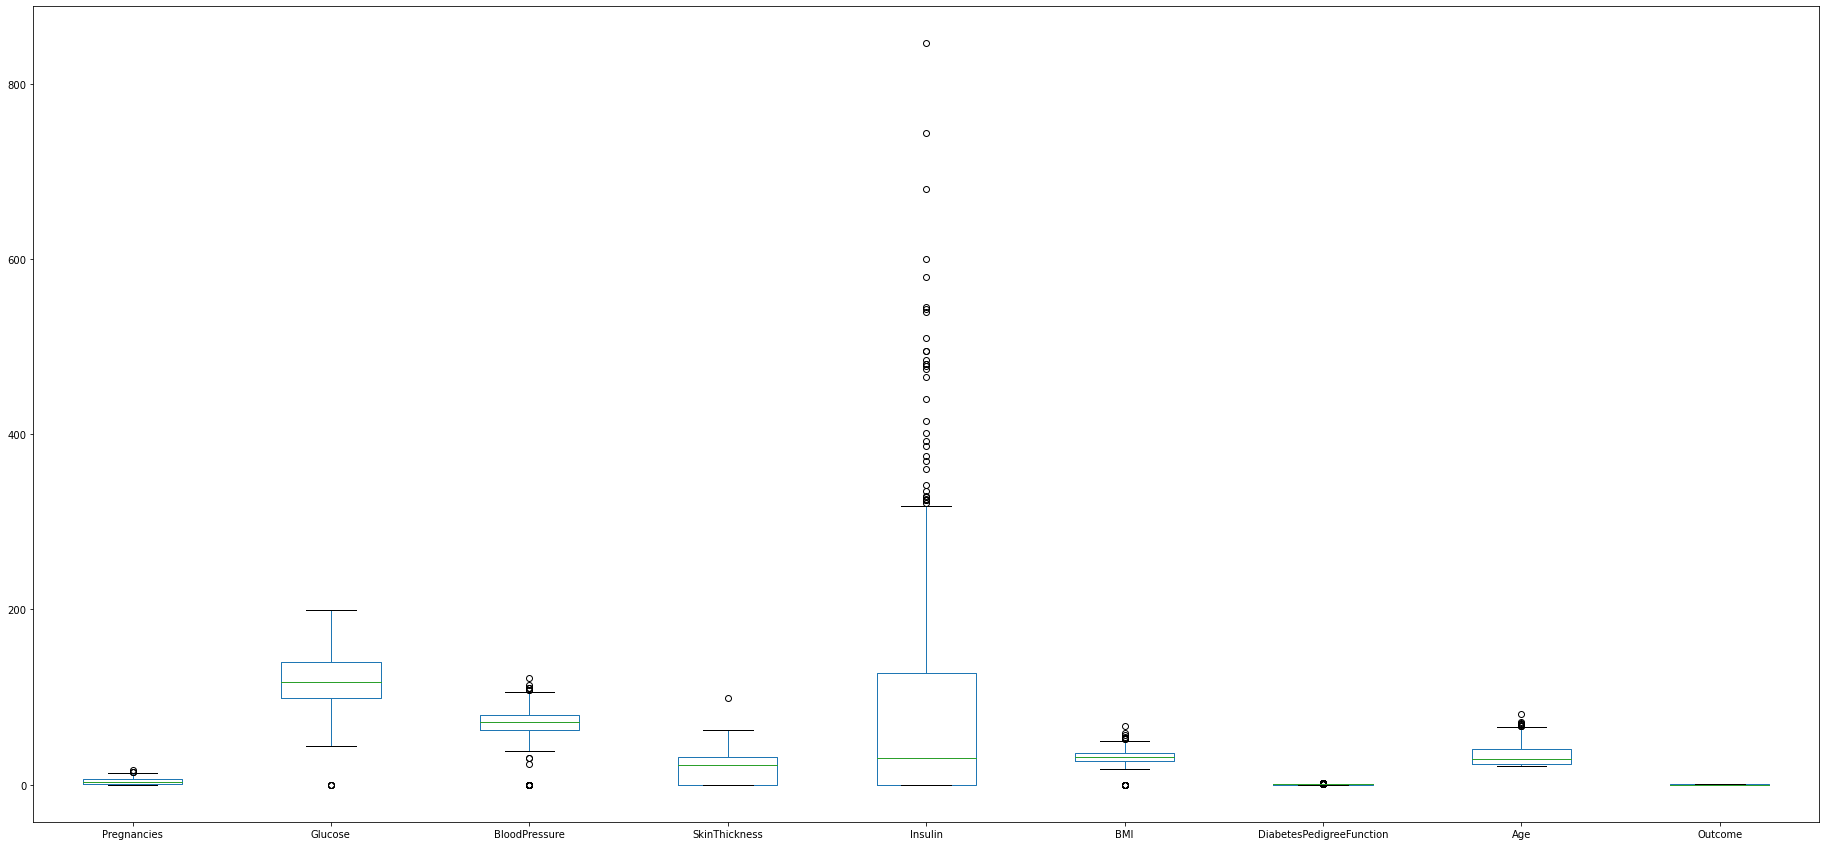

In [8]:
# Detecting the outliers on the numerical columns

df_diab.plot(kind='box', figsize=(32,15))
plt.show

"The below shows that there are outliers present on the dataset which need to be treated "

# Treating outliers with IQR

In [9]:
sorted(df_diab)
Q1=df_diab.quantile(0.25)
Q3=df_diab.quantile(0.75)
IQR=Q3-Q1
print(IQR)

Pregnancies                   5.0000
Glucose                      41.2500
BloodPressure                18.0000
SkinThickness                32.0000
Insulin                     127.2500
BMI                           9.3000
DiabetesPedigreeFunction      0.3825
Age                          17.0000
Outcome                       1.0000
dtype: float64


In [10]:
num_cleared_iqr = df_diab[~((df_diab < (Q1 - 1.5 * IQR)) |(df_diab > (Q3 + 1.5 * IQR))).any(axis=1)]
num_cleared_iqr

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
5,5,116,74,0,0,25.6,0.201,30,0
...,...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1


In [11]:
#Assigning the cleared dataset with the previous dataset

df_diab = num_cleared_iqr

In [12]:
#Looking for null values on the dataset

print(df_diab.describe(include='all'))
df_diab.isna().sum()

       Pregnancies     Glucose  BloodPressure  SkinThickness     Insulin  \
count   639.000000  639.000000     639.000000     639.000000  639.000000   
mean      3.804382  119.112676      72.120501      20.563380   65.931142   
std       3.260995   29.162175      11.348686      15.339991   79.569482   
min       0.000000   44.000000      38.000000       0.000000    0.000000   
25%       1.000000   99.000000      64.000000       0.000000    0.000000   
50%       3.000000  114.000000      72.000000      23.000000   37.000000   
75%       6.000000  137.000000      80.000000      32.000000  120.000000   
max      13.000000  198.000000     106.000000      60.000000  318.000000   

             BMI  DiabetesPedigreeFunction         Age     Outcome  
count  639.00000                639.000000  639.000000  639.000000  
mean    32.00579                  0.429177   32.715180    0.312989  
std      6.43397                  0.250957   11.080651    0.464073  
min     18.20000                  0.078

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

Outcome
0    [[AxesSubplot(0.125,0.670278;0.215278x0.209722...
1    [[AxesSubplot(0.125,0.670278;0.215278x0.209722...
dtype: object

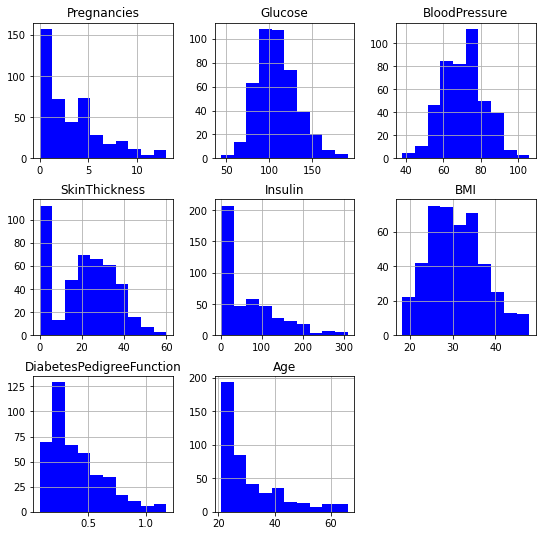

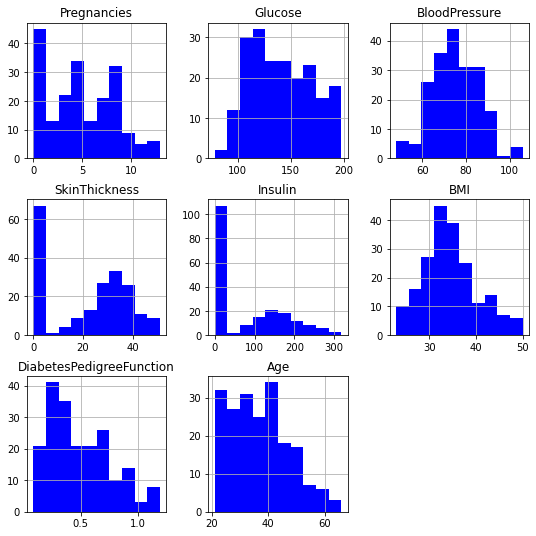

In [13]:
#Health factors grouping with Outcome

df_diab.groupby('Outcome').hist(figsize=(9, 9),color='blue')

## Visualisation of Data

<AxesSubplot:xlabel='Outcome', ylabel='count'>

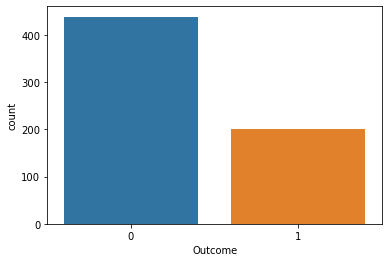

In [14]:
sns.countplot(df_diab['Outcome'])

<Figure size 2160x2160 with 0 Axes>

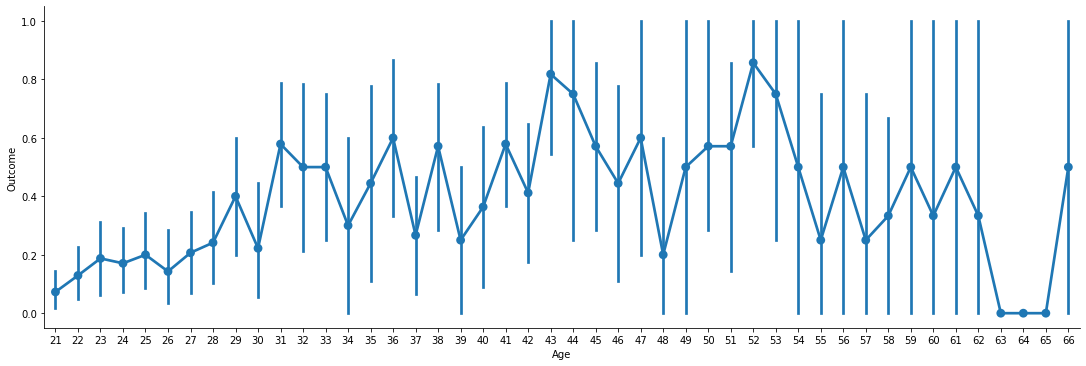

In [15]:
#comparing the outcome with the age to visualise the target age group

plt.figure(figsize=(30,30))
sns.catplot(x='Age', y='Outcome', data=df_diab, kind='point', aspect =3)

### So the people between the age of 42 - 44  &  50 - 53 have a higher chance of having diabetes

<AxesSubplot:xlabel='Pregnancies', ylabel='Outcome'>

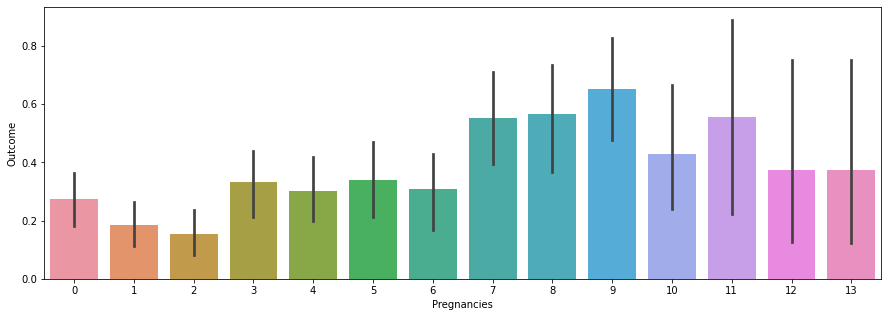

In [16]:
#comparing the outcome with the pregnancy numbers

plt.figure(figsize=(15,5))
sns.barplot(x='Pregnancies', y='Outcome', data=df_diab)

### People with 7 - 9 pregnancies have a higer chance of having diabetes

### Splitting the data into training and testing sets

In [17]:
from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import RandomForestRegressor 
from sklearn.ensemble import RandomForestClassifier 
from sklearn.metrics import roc_curve, auc
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

In [18]:
#Splitting the dataset


X = df_diab.iloc[:, df_diab.columns != 'Outcome']
Y = df_diab.iloc[:, df_diab.columns == 'Outcome']

In [20]:
#sorting the Training and Testing Dataset

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=12)

## RANDOM FOREST

In [21]:
from sklearn.ensemble import RandomForestClassifier

In [24]:
#Import scikit-learn metrics module for accuracy calculation
from sklearn import metrics

In [29]:

from sklearn.model_selection import GridSearchCV

n_estimators = [100, 300, 500, 800, 1200]
max_depth = [5, 8, 15, 25, 30]
min_samples_split = [2, 5, 10, 15, 100]
min_samples_leaf = [1, 2, 5, 10] 

hyperF = dict(n_estimators = n_estimators, max_depth = max_depth,  
              min_samples_split = min_samples_split, 
             min_samples_leaf = min_samples_leaf)

gridF = GridSearchCV(forest, hyperF, cv = 3, verbose = 1, 
                      n_jobs = -1)
bestF = gridF.fit(X_train, Y_train)

Fitting 3 folds for each of 500 candidates, totalling 1500 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:   28.2s
[Parallel(n_jobs=-1)]: Done 192 tasks      | elapsed:  1.8min
[Parallel(n_jobs=-1)]: Done 442 tasks      | elapsed:  4.1min
[Parallel(n_jobs=-1)]: Done 792 tasks      | elapsed:  7.2min
[Parallel(n_jobs=-1)]: Done 1242 tasks      | elapsed: 11.3min
[Parallel(n_jobs=-1)]: Done 1500 out of 1500 | elapsed: 15.1min finished


In [31]:
bestF.best_params_

{'max_depth': 5,
 'min_samples_leaf': 5,
 'min_samples_split': 15,
 'n_estimators': 300}

In [32]:
forestOpt = RandomForestClassifier(random_state = 1, max_depth = 5, n_estimators = 300, min_samples_split = 15, min_samples_leaf = 5)

In [34]:
modelOpt = forestOpt.fit(X_train, Y_train)
Y_pred = modelOpt.predict(X_test)

In [36]:
probs = forestOpt.predict_proba(X_test)

In [38]:
from sklearn.metrics import precision_score

Y_pred = forestOpt.predict(X_test)
print("The Precision score is :" , precision_score(Y_test, Y_pred))

The Precision score is : 0.6538461538461539


In [40]:
from sklearn.metrics import recall_score
print("The Recall Score is :" , recall_score(Y_test, Y_pred))

The Recall Score is : 0.5


In [41]:
from sklearn.metrics import f1_score
print("The F1 score is:", f1_score(Y_test, Y_pred))

The F1 score is: 0.5666666666666668


In [42]:
print('Accuracy Score of Training Set: ', forestOpt.score(X_train, Y_train))

Accuracy Score of Training Set:  0.8532289628180039


In [43]:
print('Accuracy Score of Testing set: ', forestOpt.score(X_test, Y_test))

Accuracy Score of Testing set:  0.796875


## LOGISTIC REGRESSION 

In [88]:
from sklearn.preprocessing import StandardScaler
sc_X = StandardScaler()
X_train = sc_X.fit_transform(X_train)
X_test = sc_X.transform(X_test) 

In [54]:
from sklearn.linear_model import LogisticRegression

In [58]:
from sklearn.metrics import classification_report, accuracy_score

In [69]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.model_selection import validation_curve
from sklearn import linear_model, decomposition, datasets
from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV

In [65]:
std_slc = StandardScaler()

In [68]:
pca = decomposition.PCA()

In [70]:
logistic_Reg = linear_model.LogisticRegression()

In [71]:
pipe = Pipeline(steps=[('std_slc', std_slc),
                           ('pca', pca),
                           ('logistic_Reg', logistic_Reg)])

In [72]:
n_components = list(range(1,X.shape[1]+1,1))

In [74]:
C = np.logspace(-4, 4, 50)
penalty = ['11', 'l2']

In [75]:
parameters = dict(pca__n_components=n_components,
                      logistic_Reg__C=C,
                      logistic_Reg__penalty=penalty)


In [76]:
clf_GS = GridSearchCV(pipe, parameters)
clf_GS.fit(X, Y)

GridSearchCV(estimator=Pipeline(steps=[('std_slc', StandardScaler()),
                                       ('pca', PCA()),
                                       ('logistic_Reg', LogisticRegression())]),
             param_grid={'logistic_Reg__C': array([1.00000000e-04, 1.45634848e-04, 2.12095089e-04, 3.08884360e-04,
       4.49843267e-04, 6.55128557e-04, 9.54095476e-04, 1.38949549e-03,
       2.02358965e-03, 2.94705170e-03, 4.29193426e-03, 6.25055193e-03,
       9.10298178e...
       3.72759372e+00, 5.42867544e+00, 7.90604321e+00, 1.15139540e+01,
       1.67683294e+01, 2.44205309e+01, 3.55648031e+01, 5.17947468e+01,
       7.54312006e+01, 1.09854114e+02, 1.59985872e+02, 2.32995181e+02,
       3.39322177e+02, 4.94171336e+02, 7.19685673e+02, 1.04811313e+03,
       1.52641797e+03, 2.22299648e+03, 3.23745754e+03, 4.71486636e+03,
       6.86648845e+03, 1.00000000e+04]),
                         'logistic_Reg__penalty': ['11', 'l2'],
                         'pca__n_components': [1, 2, 3,

In [77]:
print('Best Penalty:', clf_GS.best_estimator_.get_params()['logistic_Reg__penalty'])
print('Best C:', clf_GS.best_estimator_.get_params()['logistic_Reg__C'])
print('Best Number Of Components:', clf_GS.best_estimator_.get_params()['pca__n_components'])
print(); print(clf_GS.best_estimator_.get_params()['logistic_Reg'])

Best Penalty: l2
Best C: 0.12648552168552957
Best Number Of Components: 8

LogisticRegression(C=0.12648552168552957)


In [89]:
model = LogisticRegression(C=0.12648552168552957,penalty =  'l2' ,random_state = 8)
model.fit(X_train, Y_train)

LogisticRegression(C=0.12648552168552957, random_state=8)

In [90]:
pred = model.predict(X_test)
pred

array([0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0,
       1, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0], dtype=int64)

In [104]:
report = classification_report(Y_test, pred)
print('Report:' , report, sep='\n')

Report:
              precision    recall  f1-score   support

           0       0.84      0.90      0.87        94
           1       0.67      0.53      0.59        34

    accuracy                           0.80       128
   macro avg       0.75      0.72      0.73       128
weighted avg       0.80      0.80      0.80       128



In [92]:
model.intercept_

array([-0.97614184])

In [93]:
model.coef_

array([[ 0.3265689 ,  1.0467884 , -0.07457511,  0.0335736 , -0.07603908,
         0.41346989,  0.35636904,  0.22782417]])

In [100]:
score_ = model.score(X_test,Y_test)
print(score_)

0.8046875


In [117]:
conf_m = confusion_matrix(Y_test, pred)
print('conf_m:', conf_m, sep='\n', end='\n\n')

conf_m:
[[85  9]
 [16 18]]

